In [1]:
import requests
import os
import pandas as pd
import numpy as np
import matplotlib 

## API call 

In [2]:
# url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/2023CrimeData_OpenData/FeatureServer/0/query'
# batch_size = 1000  # Number of records to retrieve per batch
# offset = 0  # Initial offset value
# data_list = []
# params = {
#     'where': '1=1',
#     'outFields': '*',
#     'returnGeometry': 'false',
#     'f': 'json',
#     'resultOffset': offset,
#     'resultRecordCount': batch_size
# }

# while True:
#     params['resultOffset'] = offset
#     response = requests.get(url, params=params)
    
#     if response.status_code != 200:
#         print(f"Error {response.status_code}: {response.text}")
#         break
    
#     query_result = response.json()
#     features = query_result.get('features', [])
    
#     if not features:
#         break
    
#     for feature in features:
#         data_list.append(feature['attributes'])
    
#     if len(features) < batch_size:
#         break
    
#     offset += batch_size

# # Convert the data list to a DataFrame
# df = pd.DataFrame(data_list)

# # Specify the output directory
# output_directory = 'data'

# # Create the directory if it doesn't exist
# os.makedirs(output_directory, exist_ok=True)

# # Save the DataFrame to a CSV file in the specified directory
# output_path = os.path.join(output_directory, 'employee.csv')
# df.to_csv(output_path, index=False)

# print(f"Data saved to {output_path}")


In [3]:
# shape = 'https://gis.lojic.org/maps/rest/services/LojicSolutions/OpenDataAddresses/MapServer/3/query?outFields=*&where=1%3D1&f=geojson'
# batch_size = 1000  # Number of records to retrieve per batch
# offset = 0  # Initial offset value
# data_list = []

# while True:
#     params = {
#         'where': '1=1',
#         'outFields': '*',
#         'returnGeometry': 'false',
#         'f': 'json',
#         'resultOffset': offset,
#         'resultRecordCount': batch_size
#     }
    
#     response = requests.get(shape, params=params)
    
#     if response.status_code != 200:
#         print(f"Error {response.status_code}: {response.text}")
#         break
    
#     query_result = response.json()
#     features = query_result.get('features', [])
    
#     if not features:
#         break
    
#     for feature in features:
#         data_list.append(feature['properties'])  # Access 'properties' instead of 'attributes'
    
#     if len(features) < batch_size:
#         break
    
#     offset += batch_size

# # Convert the data list to a DataFrame
# df = pd.DataFrame(data_list)

# # Specify the output directory
# output_directory = 'data'

# # Create the directory if it doesn't exist
# os.makedirs(output_directory, exist_ok=True)

# # Save the DataFrame to a CSV file in the specified directory
# output_path = os.path.join(output_directory, 'lou_shape.csv')
# df.to_csv(output_path, index=False)

# print(f"Data saved to {output_path}")

## Functions 

In [4]:
def analyze_dataframe(data):
    analysis_df = pd.DataFrame(columns=data.columns)

    # First row: Value count of NaN values
    nan_counts = data.isna().sum()
    analysis_df.loc[0] = nan_counts

    # Second row: Data types of each col
    data_types = data.dtypes
    analysis_df.loc[1] = data_types

    # Third row: unique values in each col
    unique_values = data.nunique()
    analysis_df.loc[2] = unique_values

    # Add index labels
    analysis_df.index = ['NaN Counts', 'Data Types', 'Unique Values']

    return analysis_df

## cleaning 

In [5]:
crimeData = pd.read_csv("data/crime_24.csv", low_memory=False)


In [6]:
analyze_dataframe(crimeData)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
NaN Counts,0,16,0,37,108,0,0,0,0,301,366,36,2213,7,12,0
Data Types,object,object,int64,float64,object,object,object,object,object,object,object,object,object,object,object,int64
Unique Values,58347,425,365,982,54,506,52,2,2,22,63,49,13134,138,139,69618


In [7]:
crimeData.head(2)

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId
0,LMPD24005671,1/16/2024,1698984000000,5620.0,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,Yes,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1
1,LMPD24005377,1/15/2024,1703912400000,5619.0,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,Yes,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2


In [8]:
crimeData.shape


(69618, 16)

In [9]:
crimeData['Badge_ID'] = crimeData['Badge_ID'].fillna(0)
crimeData['LMPD_Beat'] = pd.to_numeric(crimeData['LMPD_Beat'], errors='coerce')
crimeData['LMPD_Beat'] = crimeData['LMPD_Beat'].fillna(0)
crimeData['Zip_Code'] = crimeData['Zip_Code'].str.extract(r'(\d{5})')
crimeData['Zip_Code'] = pd.to_numeric(crimeData['Zip_Code'], errors='coerce')
crimeData['Zip_Code'] = crimeData['Zip_Code'].fillna(0)
crimeData['Date_Reported'] = pd.to_datetime(crimeData['Date_Reported'], format='%m/%d/%Y', errors='coerce')
crimeData['Date_Occurred'] = crimeData['Date_Occurred'].astype(int)
crimeData['Badge_ID'] = crimeData['Badge_ID'].astype(int)
crimeData['Was_Offense_Completed'] = crimeData['Was_Offense_Completed'].astype(bool)
crimeData['LMPD_Beat'] = crimeData['LMPD_Beat'].astype(int)
crimeData['Zip_Code'] = crimeData['Zip_Code'].astype(int)
crimeData['ObjectId'] = crimeData['ObjectId'].astype(int)


In [10]:
crimeData.dtypes

Incident_Number                   object
Date_Reported             datetime64[ns]
Date_Occurred                      int64
Badge_ID                           int64
Offense_Classification            object
Offense_Code_Name                 object
NIBRS_Code                        object
NIBRS_Group                       object
Was_Offense_Completed               bool
LMPD_Division                     object
LMPD_Beat                          int64
Location_Category                 object
Block_Address                     object
City                              object
Zip_Code                           int64
ObjectId                           int64
dtype: object

<Axes: ylabel='count'>

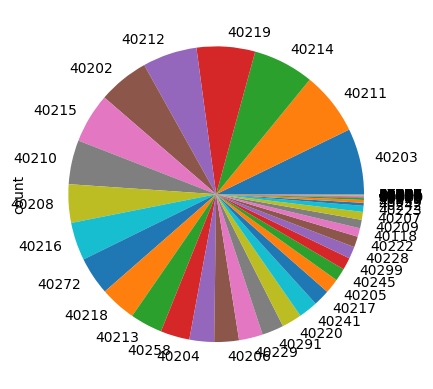

In [11]:
crimeData["Zip_Code"].value_counts().plot.pie()

In [13]:
# Formats to keep the shape info out of scientific notation 
pd.options.display.float_format = '{:.10f}'.format
louShape = pd.read_csv('data/lou_shape.csv')
louShape.head()

,OBJECTID,ZIPCODE,SHAPE.AREA,SHAPE.LEN
0,1,40203,86089962.2570039034,76402.5846553515
1,2,40210,88252436.3631687015,58504.6516742492
2,3,40059,334263239.9099760056,102937.5578217500
3,4,40220,215063039.1049230099,85234.9047210928
4,5,40041,3513355.2361718798,8445.2223102237


In [15]:

crimeData['Zip_Code'] = crimeData['Zip_Code'].astype(int)

louShape['ZIPCODE'] = louShape['ZIPCODE'].astype(int)

crimeDataShape = pd.merge(crimeData, louShape[['ZIPCODE', 'SHAPE.AREA', 'SHAPE.LEN']], left_on='Zip_Code', right_on='ZIPCODE', how='left')

crimeDataShape.drop('ZIPCODE', axis=1, inplace=True)

crimeDataShape.head()

,Incident_Number,Date_Reported,Date_Occurred,Badge_ID,Offense_Classification,Offense_Code_Name,NIBRS_Code,NIBRS_Group,Was_Offense_Completed,LMPD_Division,LMPD_Beat,Location_Category,Block_Address,City,Zip_Code,ObjectId,SHAPE.AREA,SHAPE.LEN
0,LMPD24005671,2024-01-16,1698984000000,5620,14 AUTO THEFT,"TBUT OR DISP AUTO $10,000 < $1,000,000 514.030...",240,A,True,2nd Division,223,Commercial/Office Building,1000 BLOCK S 9TH ST,LOUISVILLE,40203,1,86089962.2570039034,76402.5846553515
1,LMPD24005377,2024-01-15,1703912400000,5619,23 THEFT OTHER,THEFT OF MAIL MATTER 514.140 23265 23H,23H,A,True,2nd Division,211,Residence/Home,300 BLOCK LOUIS COLEMAN JR DR,LOUISVILLE,40212,2,119677381.4680069983,58372.6945428320
2,LMPD24005367,2024-01-15,1699592400000,5577,23 THEFT OTHER,"TBUT OR DISP ALL OTHERS $500 < $1,000 514.030 ...",23H,A,True,6th Division,612,Residence/Home,4100 BLOCK QUIET WAY,LOUISVILLE,40219,3,433645079.6078370214,170729.6101326330
3,LMPD24005344,2024-01-15,1673326800000,8373,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,True,6th Division,625,Parking/ Drop Lot/ Garage,2900 BLOCK HIKES LN,LOUISVILLE,40220,4,215063039.1049230099,85234.9047210928
4,LMPD24005434,2024-01-15,1703826000000,5621,22 THEFT MV PARTS,THEFT OF MOTOR VEHICLE REGISTRATION PLATE/DECA...,23G,A,True,7th Division,736,Parking/ Drop Lot/ Garage,8300 BLOCK PRESTONVIEW LN,LOUISVILLE,40219,5,433645079.6078370214,170729.6101326330
